In [2]:
import os
os.chdir('..')

In [4]:
from deterministic.homogeneous import solve_homogeneous_system, compute_diagram, compute_2D_diagram, compute_2D_botnet, compute_botnet_threshold
from deterministic.plots import plot_evolution, plot_diagram, plot_2D_diagram, plot_3D_protected, plot_2D_botnet, plot_botnet_threshold, plot_2D_botnet_time

import numpy as np
import pathlib
import pickle
import pandas as pd

# Analysis of a SF graph

We generate a scale-free graph with average degree $\langle k \rangle$ and re-scale $\beta$ so that $\beta' = \beta/ \langle k \rangle$. Then, we look at the fraction of proected nodes as a function of $\beta$ and $\epsilon$. This should reproduce the phase diagram of the white worm, that is, if it can spread it will do so and cover almost the whole graph, but if it can't then no nodes will be protected. 


We know that in SF networks it is possible to have a macroscopic fraction of infections even in areas where the homogeneous system cannot. This is due to the presence of hubs, which can locally create a cluster of infected nodes. Thus, as somewhat expected, we shee in the figure that we have spreading above the black lines of the critical approximation.

In [3]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('protected_SF_N10000_*'):

    bW = float(file_path.stem.split('_bW')[1].split('_')[0])
    e = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.01]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bW, e, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

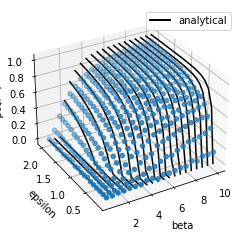

In [4]:
plot_3D_protected(results)

Now we look at the $\beta$ plane to see when the black worm is able to completely surpass the white one. In this case, given the abscence of critical threshold, the behavior of the black worm is similar to the original one but now the white worm can spread more easily, and thus be competitive even for compatible values of spreading in both systems.

In [5]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_SF_N10000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

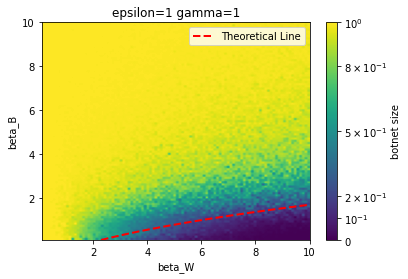

In [6]:
plot_2D_botnet(results)

Next we study the time the black worm is above a critical size for some fixed values of $\beta$ in the region where there is some interest (where the white worm can actually do something). We observe that this time the theoretical expression does not match the results, but note that the expression just gives us the expected size of the white worm, it does not say anything about time. **It could be that it simply takes longer for the black worm to spread, even if there was not a white worm at all.**

If we compare the results to the ER network, we see a very similar evolution, but with sharper cuts. In general, it is easier to protect the system with the SF network.

In [7]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 1.0

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_SF_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

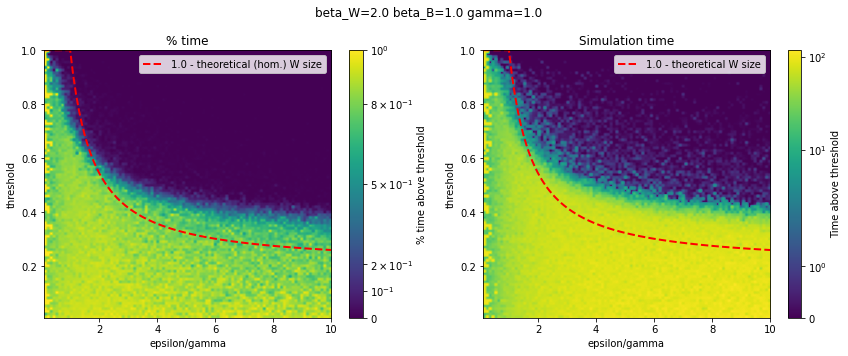

In [8]:
plot_2D_botnet_time(results, bW, bB, gamma)

In [9]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 2.0

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_SF_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

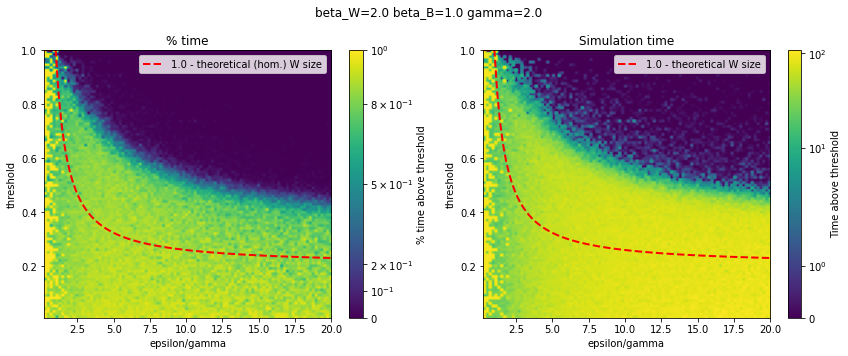

In [10]:
plot_2D_botnet_time(results, bW, bB, gamma)

In [11]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 0.5

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_SF_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

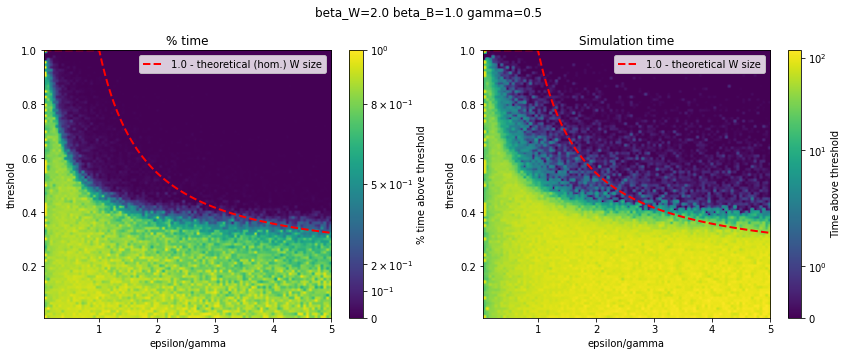

In [12]:
plot_2D_botnet_time(results, bW, bB, gamma)

# Cells to extract data for the paper

In [5]:
results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_SF_N10000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

data = pd.DataFrame({'beta_b': results[:, 0], 'beta_w': results[:, 1], 'botnet': results[:, 2]})
data.to_csv('plots/data/SF_botnet_size.csv', index=False)